In [15]:
import os
import re
import pandas as pd
import mpg.mpgio as mpgio
import mpg.games.mpg as mpg
import numpy as np
base_dir="/run/media/ramizouari/INTENSO/MPG/"
directory="/run/media/ramizouari/INTENSO/MPG/dataset/sparse"
dense_dataset=[]
k=0
for file in os.listdir(directory):
    match=re.search(R"gnp_uniform_mpg_(\d+)_(\d+)_(\d+)(\.edgelist\.gz)",file)
    if match:
        n=int(match.group(1))
        c=int(match.group(2))
        extension=match.group(4)
        graph=mpgio.read_mpg(os.path.join(directory,file))
        K = np.sum(np.fromiter((np.abs(c) for x, y, z, c in graph.as_min_max_system().equivalent_system.equivalent_system.constraints), dtype=int))
        dense_dataset.append(dict(filename=match.group(0),size=os.path.getsize(os.path.join(directory,file)),K=K,c=c,n=n))
        k+=1
    if k>500:
        break

dense_dataset=pd.DataFrame(dense_dataset,columns=["filename","size","K","c","n"])
dense_dataset["filename"]=dense_dataset["filename"].map(lambda x : x.rstrip(".edgelist.gz"))
dense_dataset

,filename,size,K,c,n
0,gnp_uniform_mpg_4_1_0,75,2,1,4
1,gnp_uniform_mpg_4_1_1,75,8,1,4
2,gnp_uniform_mpg_4_1_2,71,2,1,4
3,gnp_uniform_mpg_4_1_3,73,10,1,4
4,gnp_uniform_mpg_4_1_4,73,4,1,4
...,...,...,...,...,...
496,gnp_uniform_mpg_121_9_6,3137,1468,9,121
497,gnp_uniform_mpg_121_9_7,3230,1552,9,121
498,gnp_uniform_mpg_121_9_8,3068,1408,9,121
499,gnp_uniform_mpg_121_9_9,3035,1378,9,121


<Axes: xlabel='n', ylabel='K'>

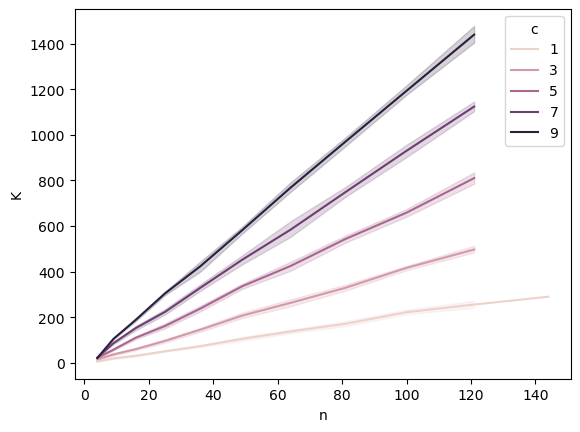

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

fig,ax=plt.subplots()
sns.lineplot(data=dense_dataset,x="n",y="K",hue="c")